# [作業目標]
- 請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果 
- 思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)
- 思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

# [作業重點]
- 綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train).copy()
app_train.shape

(307511, 122)

In [4]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
app_train['CODE_GENDER'].unique()

array(['M', 'F', 'XNA'], dtype=object)

In [5]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
app_train['DAYS_EMPLOYED']

0           -637
1          -1188
2           -225
3          -3039
4          -3038
           ...  
307506      -236
307507    365243
307508     -7921
307509     -4786
307510     -1262
Name: DAYS_EMPLOYED, Length: 307511, dtype: int64

In [11]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

In [12]:
app_train[['DAYS_EMPLOYED_ANOM', 'DAYS_EMPLOYED']]

,DAYS_EMPLOYED_ANOM,DAYS_EMPLOYED
0,False,-637.0
1,False,-1188.0
2,False,-225.0
3,False,-3039.0
4,False,-3038.0
...,...,...
307506,False,-236.0
307507,True,NaN
307508,False,-7921.0
307509,False,-4786.0


### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [15]:
app_train.corr()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM
SK_ID_CURR,1.000000,-0.002108,0.001654,0.001216,0.000703,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,...,0.000167,0.001073,0.000282,-0.002672,-0.002193,0.002099,0.000485,0.001025,0.004659,0.001368
TARGET,-0.002108,1.000000,-0.030896,-0.021851,-0.006148,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,...,-0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,-0.012462,-0.002022,0.019930,-0.045987
NAME_CONTRACT_TYPE,0.001654,-0.030896,1.000000,0.004022,0.067177,0.029998,-0.003531,-0.221648,-0.241544,-0.185850,...,-0.005190,-0.007308,0.055821,0.000453,-0.005118,-0.015296,-0.014369,-0.021962,-0.052494,-0.054967
FLAG_OWN_CAR,0.001216,-0.021851,0.004022,1.000000,-0.002817,0.102023,0.083383,0.116225,0.141588,0.120310,...,0.002184,0.007299,0.006741,0.002669,0.000572,0.000242,0.020477,-0.009936,-0.036345,-0.154778
FLAG_OWN_REALTY,0.000703,-0.006148,0.067177,-0.002817,1.000000,-0.002366,0.002934,-0.039270,-0.005225,-0.045537,...,-0.019364,-0.025130,-0.000173,-0.004120,-0.009267,0.007474,-0.004480,0.015451,0.067451,0.070107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_WEEK,0.002099,0.000788,-0.015296,0.000242,0.007474,-0.002436,0.002387,-0.001275,0.013881,-0.001007,...,-0.001275,-0.001770,0.000081,0.004706,0.217412,1.000000,-0.014096,-0.015115,0.018917,0.003043
AMT_REQ_CREDIT_BUREAU_MON,0.000485,-0.012462,-0.014369,0.020477,-0.004480,-0.010808,0.024700,0.054451,0.039148,0.056422,...,-0.002729,0.001285,-0.003612,-0.000018,-0.005258,-0.014096,1.000000,-0.007789,-0.004975,-0.034111
AMT_REQ_CREDIT_BUREAU_QRT,0.001025,-0.002022,-0.021962,-0.009936,0.015451,-0.007836,0.004859,0.015925,0.010124,0.016432,...,-0.001575,-0.001010,-0.002004,-0.002716,-0.004416,-0.015115,-0.007789,1.000000,0.076208,0.015252
AMT_REQ_CREDIT_BUREAU_YEAR,0.004659,0.019930,-0.052494,-0.036345,0.067451,-0.041550,0.011690,-0.048448,-0.011320,-0.050998,...,-0.007009,-0.012126,-0.005457,-0.004597,-0.003355,0.018917,-0.004975,0.076208,1.000000,0.050001


In [5]:
# 觀察相關係數
app_train.corr()['TARGET']

SK_ID_CURR                    -0.002108
TARGET                         1.000000
NAME_CONTRACT_TYPE            -0.030896
FLAG_OWN_CAR                  -0.021851
FLAG_OWN_REALTY               -0.006148
CNT_CHILDREN                   0.019187
AMT_INCOME_TOTAL              -0.003982
AMT_CREDIT                    -0.030369
AMT_ANNUITY                   -0.012817
AMT_GOODS_PRICE               -0.039645
REGION_POPULATION_RELATIVE    -0.037227
DAYS_BIRTH                    -0.078239
DAYS_EMPLOYED                  0.074958
DAYS_REGISTRATION              0.041975
DAYS_ID_PUBLISH                0.051457
OWN_CAR_AGE                    0.037612
FLAG_MOBIL                     0.000534
FLAG_EMP_PHONE                 0.045982
FLAG_WORK_PHONE                0.028524
FLAG_CONT_MOBILE               0.000370
FLAG_PHONE                    -0.023806
FLAG_EMAIL                    -0.001758
CNT_FAM_MEMBERS                0.009308
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893


## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [16]:
app_corr = app_train.corr()['TARGET']

In [24]:
#相關係數，數值最大 15 個
app_corr.nlargest(n=15, keep='all')

TARGET                         1.000000
DAYS_EMPLOYED                  0.074958
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
OWN_CAR_AGE                    0.037612
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
Name: TARGET, dtype: float64

In [27]:
max_index = app_corr.nlargest(n=15, keep='all').index
max_index

Index(['TARGET', 'DAYS_EMPLOYED', 'REGION_RATING_CLIENT_W_CITY',
       'REGION_RATING_CLIENT', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH',
       'REG_CITY_NOT_WORK_CITY', 'FLAG_EMP_PHONE', 'REG_CITY_NOT_LIVE_CITY',
       'FLAG_DOCUMENT_3', 'DAYS_REGISTRATION', 'OWN_CAR_AGE',
       'LIVE_CITY_NOT_WORK_CITY', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE'],
      dtype='object')

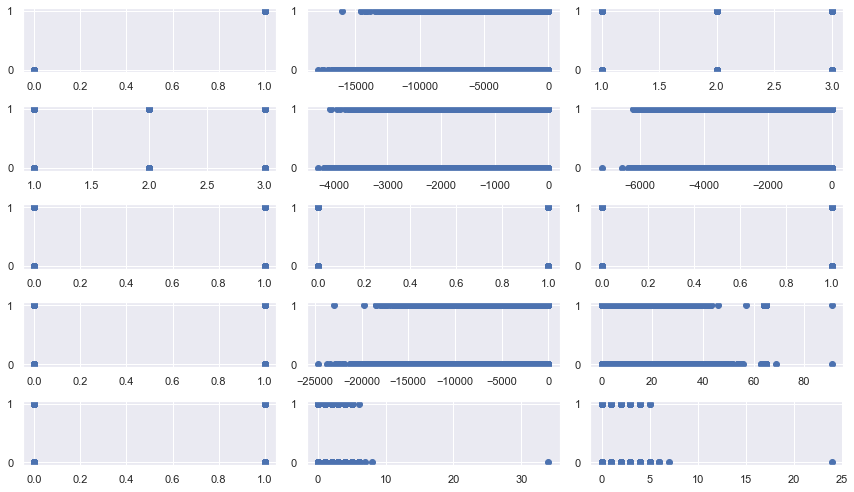

In [40]:
# draw the plt
import seaborn as sns
sns.set()

fig = plt.figure(figsize=(12,7))

columns = 3
rows = 5

for i,j in zip(range(1, columns*rows+1), max_index):
    fig.add_subplot(rows, columns, i)
    plt.scatter(app_train[j], app_train['TARGET'])

plt.tight_layout()
plt.show()

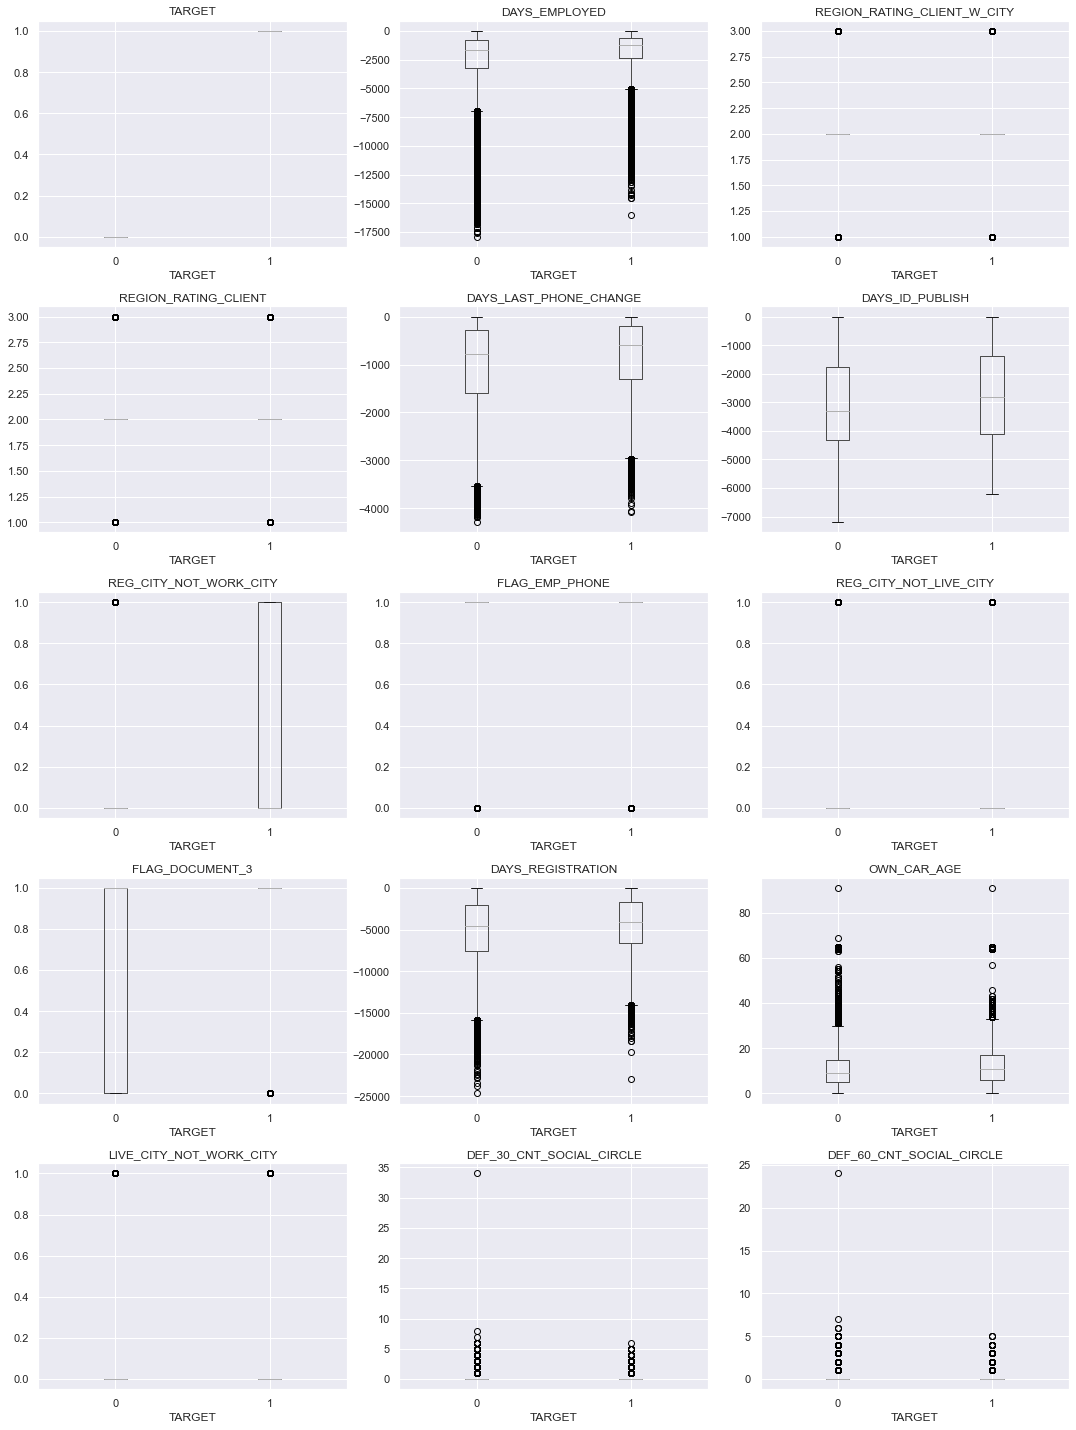

In [123]:
# create boxplot for the top15 related columns
columns=3
rows=5

fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(15,20))


for (i,ax),j in zip(enumerate(axes.flat), max_index): # enumerate 基本上就是給那個資料點index:0,1,2,3....
    app_train.boxplot(column=j, by = 'TARGET', ax=ax, figsize=(12,7))

plt.tight_layout(pad=1, w_pad=0.5, h_pad=1.0)
plt.suptitle('')
plt.show()

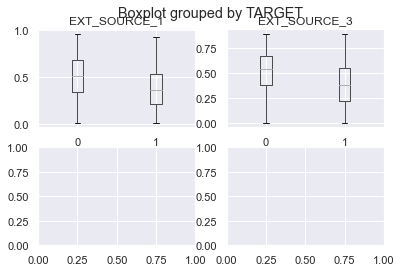

In [64]:
fig, axes = plt.subplots(nrows=2, ncols=2)
app_train.boxplot(column='EXT_SOURCE_1', by = 'TARGET', ax=axes[0,0])
app_train.boxplot(column='EXT_SOURCE_3', by = 'TARGET', ax=axes[0,1])

In [22]:
#相關係數，數值最小 15 個
app_corr.nsmallest(n=15, keep='all')

EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_BIRTH                   -0.078239
DAYS_EMPLOYED_ANOM           -0.045987
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
ELEVATORS_MEDI               -0.033863
FLOORSMIN_AVG                -0.033614
FLOORSMIN_MEDI               -0.033394
LIVINGAREA_AVG               -0.032997
Name: TARGET, dtype: float64

In [41]:
min_index = app_corr.nsmallest(n=15, keep='all').index

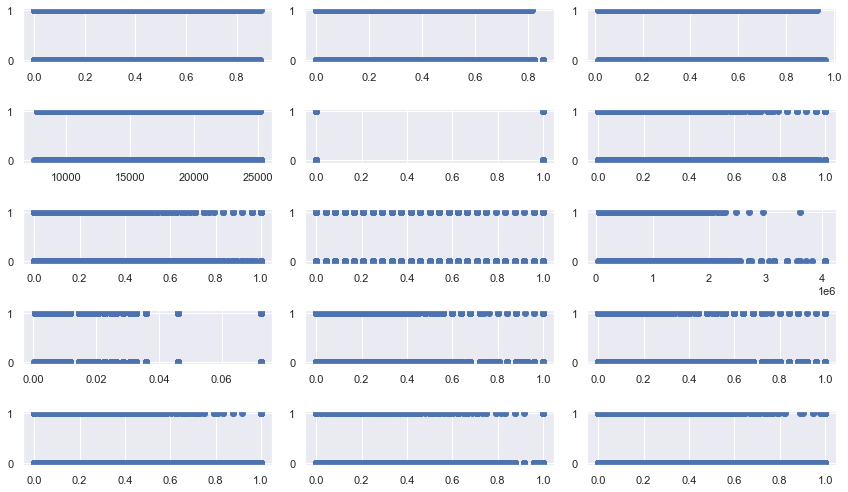

In [42]:
fig = plt.figure(figsize=(12,7))

columns = 3
rows = 5

for i,j in zip(range(1, columns*rows+1), min_index):
    fig.add_subplot(rows, columns, i)
    plt.scatter(app_train[j], app_train['TARGET'])

plt.tight_layout()
plt.show()

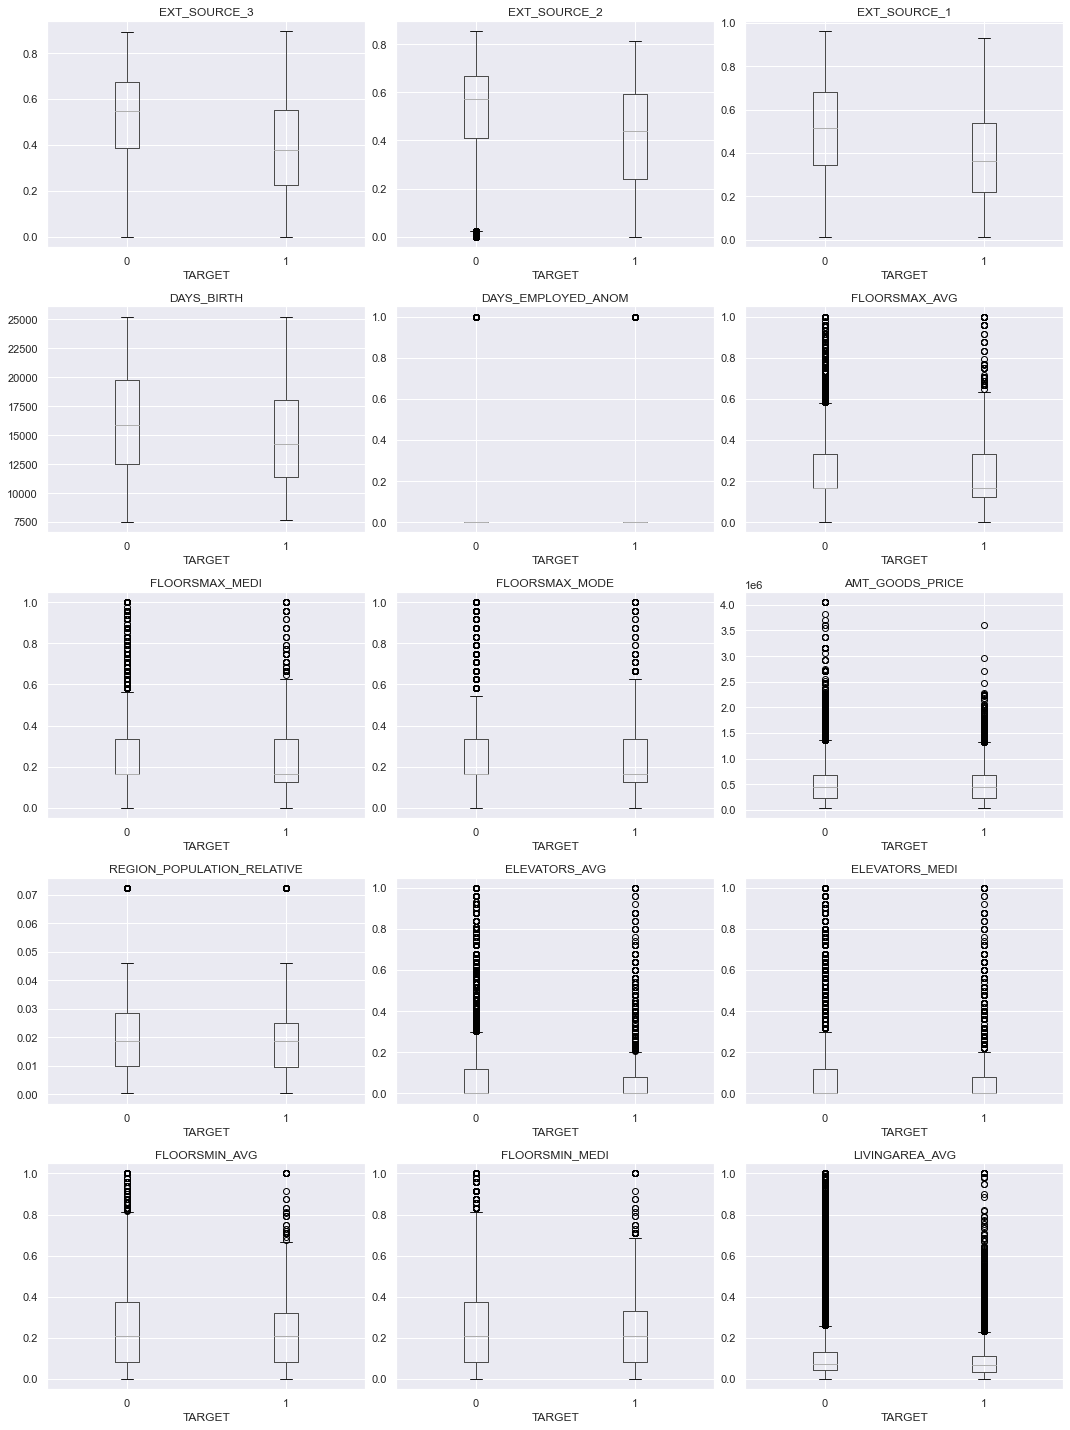

In [124]:
# create boxplot for the top15 related columns
columns=3
rows=5

fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(15,20))


for (i,ax),j in zip(enumerate(axes.flat), min_index):
    app_train.boxplot(column=j, by = 'TARGET', ax=ax, figsize=(12,7))

plt.tight_layout(pad=1, w_pad=0.5, h_pad=1.0)
plt.suptitle('')
plt.show()